In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [4]:
dfx = pd.read_csv("./Datasets/Logistic_X_Train.csv")
dfy = pd.read_csv("./Datasets/Logistic_Y_Train.csv")


In [8]:
X = dfx.values
Y = dfy.values

In [9]:
X.shape

(3000, 3)

In [11]:
print(Y.shape)

(3000, 1)


In [13]:
u = X.mean(axis=0)
std = X.std(axis=0)

In [14]:
X = (X-u)/std

In [15]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

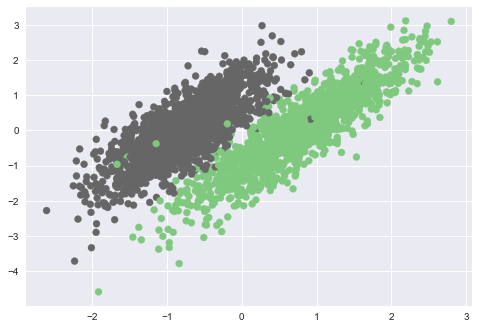

In [18]:
plt.style.use("seaborn")
plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent)
plt.show()

In [19]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def getYPred(theta,X):
    return sigmoid(np.dot(X,theta))

def predict(theta,X):
    Y_pred = getYPred(theta,X)
    outputs = np.zeros((Y_pred.shape))
    outputs[Y_pred>0.5] = 1
    return outputs
def error(theta,X,Y):
    Y_ = getYPred(theta,X)
    m = X.shape[0]
    err = -(np.sum(Y*np.log(Y_)+(1-Y)*np.log(1-Y_)))
    return err/m
def getGrad(theta,X,Y):
    Y_ = getYPred(theta,X)
    grad = np.dot(X.T,(Y_-Y))
    return grad
def gradDescent(X,Y,lr,max_itr):
    theta = np.zeros((X.shape[1],1))
    err_list = []
    for i in range(max_itr):
        grad = getGrad(theta,X,Y)
        e = error(theta,X,Y)
        theta = theta-lr*grad
        err_list.append(e)
    return theta,err_list

In [24]:
print(X)
theta,err_list = gradDescent(X,Y,0.01,200)

[[ 1.         -0.93471307 -0.24439694 -0.46140414]
 [ 1.         -0.7823013  -0.19327286 -1.08586573]
 [ 1.         -0.46707053  0.56681072 -1.17534766]
 ...
 [ 1.          0.06059095  0.62470809 -1.83827342]
 [ 1.          1.13777964 -0.13681202  1.22033571]
 [ 1.         -0.74013008 -0.42526137 -1.29728616]]


c:\users\yash\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
c:\users\yash\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
